In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### We will import the necessary libraries. 

1. 'numpy' is a Python arithmetic library.
2. 'pandas' was used to import csv data into table format, a technique known as data frame organization.
3. 'seaborn' will use the matplotlib package to plot the graph so that everyone can see how the data is distributed.
4. 'matplotlib' to generate the graph

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data 

Import the data provided by Spaceship Titanic. 
There are two parts: 
train data for modeling and 
test data for testing.

In [3]:
train_data=pd.read_csv(r"C:\Users\Lokesh\Downloads\train.csv")
test_data=pd.read_csv(r"C:\Users\Lokesh\Downloads\test.csv")

The number of rows and characteristics of the Train and Test are displayed.

In [4]:
print("Train size :",train_data.shape)
print("Test size :",test_data.shape)

Train size : (8693, 14)
Test size : (4277, 13)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Exploratory Data Analysis 

It is to comprehend the data before making changes to the dataset. Essentially, in this research, we will use EDA to get these answers.

What sort of data we obtain, such as file format, data size, number of columns, and so on.
How complicated is this information, for example, how are the files connected to one another, and is there duplicate data?
Is the information gathered sufficient to satisfy our objectives? Is this sufficient for modeling?

In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The statistical value is shown as

count = number
mean = average
std = standard deviation
min = the smallest number
25% = 25th percentile value
50% = 50th percentile
75% = 75th percentile
max = the largest value

In [7]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
print("Missing Values Training Set")
train_data.isna().sum()

Missing Values Training Set


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

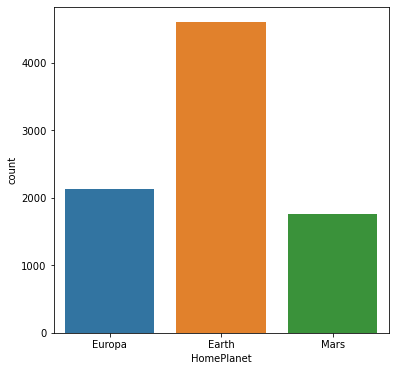

In [9]:
#Make a bar graph comparing persons who have been relocated or have not been transferred to different dimensions from HomePlanet.

plt.figure(figsize=(6,6))
sns.countplot(data=train_data, x='HomePlanet')

Displays the values and counts in HomePlanet.

In [10]:
#Displays the values and counts in HomePlanet.

train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

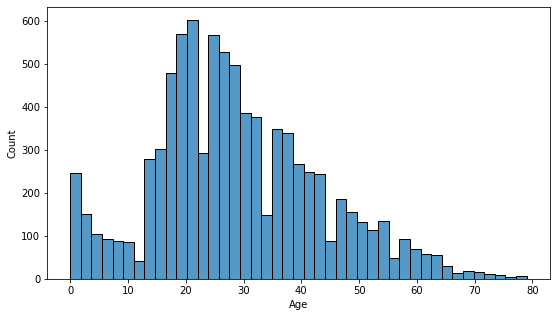

In [11]:
#Make a histogram by comparing the numbers for each age group (Age).

plt.figure(figsize=(9,5))
sns.histplot(data=train_data, x='Age')

<AxesSubplot:xlabel='Destination', ylabel='count'>

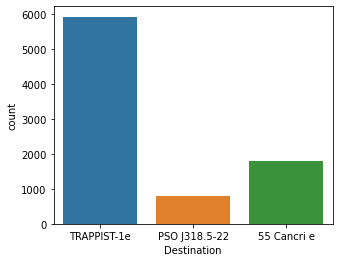

In [12]:
#Make a bar chart by comparing the facts on where people have been relocated on whatever planet. (Destination)

plt.figure(figsize=(5,4))
sns.countplot(data=train_data, x='Destination')

In [13]:
#Displays the value and number in Destination.

train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

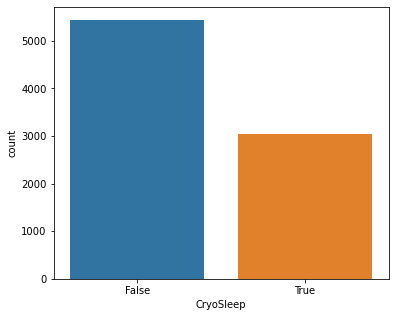

In [14]:
#Create a bar chart that compares CryoSleep people with those who are not CryoSleep.

plt.figure(figsize=(6,5))
sns.countplot(data=train_data, x='CryoSleep')

In [15]:
#Displays the values and amounts contained in CryoSleep.

train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<AxesSubplot:xlabel='VIP', ylabel='count'>

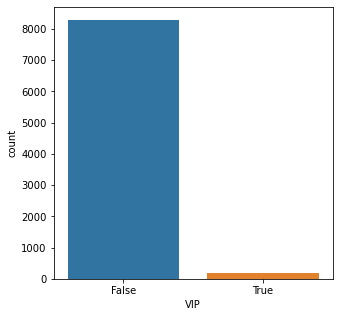

In [16]:
#Make a bar chart comparing VIPs to the general population.

plt.figure(figsize=(5,5))
sns.countplot(data=train_data, x='VIP')

In [17]:
#Displays the value and number of VIPs.

train_data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='count'>

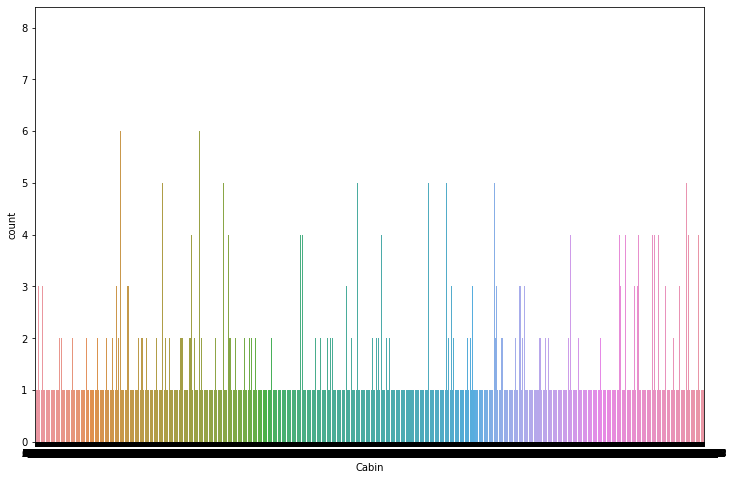

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_data, x='Cabin')

The graph indicates that the values in Cabin are extremely dispersed. As a result, we will replace the value in Cabin with "Z/9999/Z.

Make a bar chart that illustrates how much each component of the cost has cost. It displays the prices for RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck.

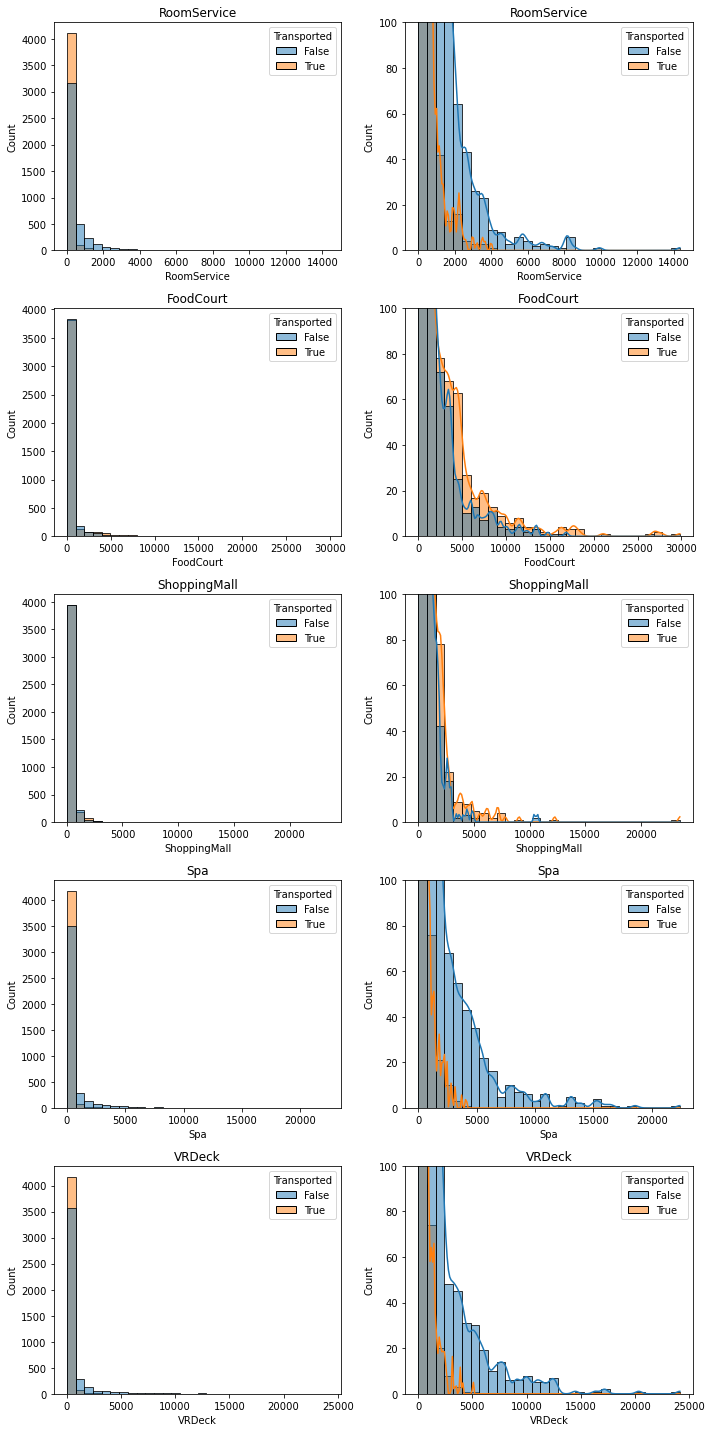

In [19]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_data, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_data, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

# Feature Engineering and Data Preprocessing

Fill in the missing information by

Instead of popular data, HomePlant, CryoSleep, Destination, and VIP data will be utilized.

Because we do not know the precise number of seats, the Cabin will be replaced by a new value, Z/9999/Z.

The passenger's middle age will be utilized in the Age column.

VRDeck will utilize 0 instead of RoomService, FoodCourt, ShoppingMall, and Spa.


In [20]:
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0], inplace=True)

train_data['CryoSleep'].fillna(False, inplace=True)
test_data['CryoSleep'].fillna(False, inplace=True)

train_data['Cabin'].fillna('Z/9999/Z', inplace=True)
test_data['Cabin'].fillna('Z/9999/Z', inplace=True)

train_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)
test_data['Destination'].fillna(test_data['Destination'].mode()[0], inplace=True)

train_data['Age'].fillna((train_data['Age'].median()), inplace=True)
test_data['Age'].fillna((test_data['Age'].median()), inplace=True)

train_data['VIP'].fillna(False, inplace=True)
test_data['VIP'].fillna(False, inplace=True)

train_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [21]:
train_data['TotalSpent'] = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_data['TotalSpent'] = test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [22]:
train_data[["CabinDeck", "CabinNum", "CabinSide"]] = train_data["Cabin"].str.split("/", expand=True)
test_data[["CabinDeck", "CabinNum", "CabinSide"]] = test_data["Cabin"].str.split("/", expand=True)

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

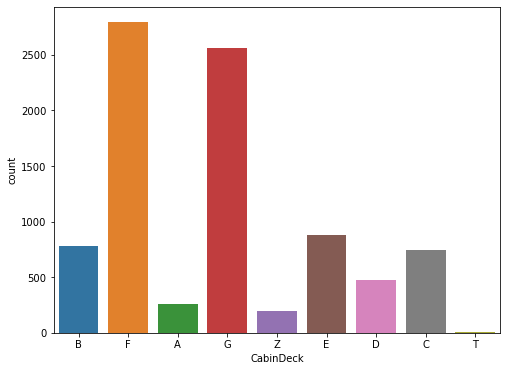

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='CabinDeck')

<AxesSubplot:xlabel='CabinNum', ylabel='count'>

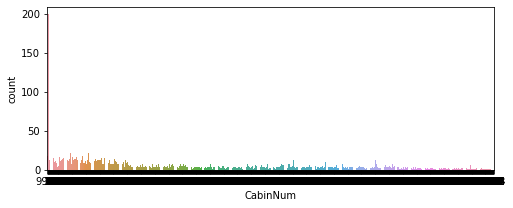

In [24]:
plt.figure(figsize=(8,3))
sns.countplot(data=train_data, x='CabinNum')

<AxesSubplot:xlabel='CabinSide', ylabel='count'>

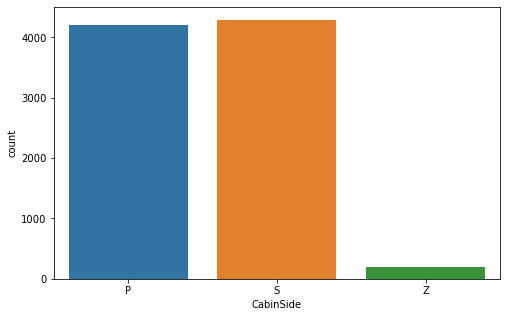

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_data, x='CabinSide')

In [26]:
train_data[["Group", "GroupPos"]] = train_data["PassengerId"].str.split("_", expand=True)
test_data[["Group", "GroupPos"]] = test_data["PassengerId"].str.split("_", expand=True)

<AxesSubplot:xlabel='Group', ylabel='count'>

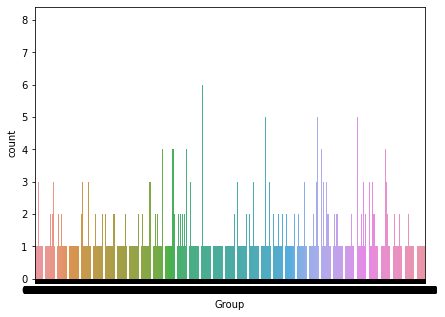

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(data=train_data, x='Group')

<AxesSubplot:xlabel='GroupPos', ylabel='count'>

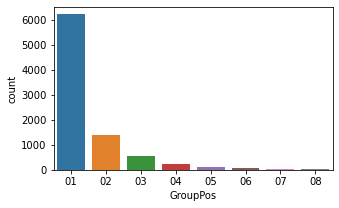

In [28]:
plt.figure(figsize=(5,3))
sns.countplot(data=train_data, x='GroupPos')

In [29]:
train_data['GroupPos'].value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: GroupPos, dtype: int64

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

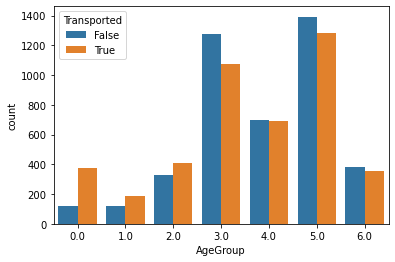

In [30]:
train_data['AgeGroup'] = np.nan
train_data.loc[train_data['Age'] <= 5, 'AgeGroup'] = 0
train_data.loc[(train_data['Age'] > 5) & (train_data['Age'] <= 12), 'AgeGroup'] = 1
train_data.loc[(train_data['Age'] > 12) & (train_data['Age'] <= 17), 'AgeGroup'] = 2
train_data.loc[(train_data['Age'] > 17) & (train_data['Age'] <= 25), 'AgeGroup'] = 3
train_data.loc[(train_data['Age'] > 25) & (train_data['Age'] <= 30), 'AgeGroup'] = 4
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 50), 'AgeGroup'] = 5
train_data.loc[train_data['Age'] > 50, 'AgeGroup'] = 6

test_data['AgeGroup'] = np.nan
test_data.loc[test_data['Age'] <= 5, 'AgeGroup'] = 0
test_data.loc[(test_data['Age'] > 5) & (test_data['Age'] <= 12), 'AgeGroup'] = 1
test_data.loc[(test_data['Age'] > 12) & (test_data['Age'] <= 17), 'AgeGroup'] = 2
test_data.loc[(test_data['Age'] > 17) & (test_data['Age'] <= 25), 'AgeGroup'] = 3
test_data.loc[(test_data['Age'] > 25) & (test_data['Age'] <= 30), 'AgeGroup'] = 4
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] <= 50), 'AgeGroup'] = 5
test_data.loc[test_data['Age'] > 50, 'AgeGroup'] = 6

sns.countplot(data=train_data, x='AgeGroup', hue='Transported')

# Data Modeling 

In [31]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

train_data['CryoSleep']=label_enc.fit_transform(train_data['CryoSleep'])
test_data['CryoSleep']=label_enc.fit_transform(test_data['CryoSleep'])

train_data['VIP']=label_enc.fit_transform(train_data['VIP'])
test_data['VIP']=label_enc.fit_transform(test_data['VIP'])

train_data['Transported']=label_enc.fit_transform(train_data['Transported'])

In [32]:
from sklearn.preprocessing import OneHotEncoder

train_data = pd.get_dummies(train_data, columns = ['HomePlanet','Destination', 'CabinDeck', 'CabinSide'])
train_data

test_data = pd.get_dummies(test_data, columns = ['HomePlanet','Destination', 'CabinDeck', 'CabinSide'])
test_data

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_Z,CabinSide_P,CabinSide_S,CabinSide_Z
0,0013_01,1,G/3/S,27.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0018_01,0,F/4/S,19.0,0,0.0,9.0,0.0,2823.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0019_01,1,C/0/S,31.0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0021_01,0,C/1/S,38.0,0,0.0,6652.0,0.0,181.0,585.0,...,1,0,0,0,0,0,0,0,1,0
4,0023_01,0,F/5/S,20.0,0,10.0,0.0,635.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,G/1496/S,34.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4273,9269_01,0,Z/9999/Z,42.0,0,0.0,847.0,17.0,10.0,144.0,...,0,0,0,0,0,0,1,0,0,1
4274,9271_01,1,D/296/P,26.0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4275,9273_01,0,D/297/P,26.0,0,0.0,2680.0,0.0,0.0,523.0,...,0,1,0,0,0,0,0,1,0,0


In [33]:
#Use the drop_col command to discard unused data. In this case, drop Cabin Name, CabinNum, Group and PassengerId.

columns_drop = ['Cabin', 'Name', 'CabinNum', 'Group', 'PassengerId']
train_data = train_data.drop(columns = columns_drop)
test_data = test_data.drop(columns = columns_drop)

In [34]:
train_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'TotalSpent', 'GroupPos', 'AgeGroup',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinDeck_Z', 'CabinSide_P', 'CabinSide_S',
       'CabinSide_Z'],
      dtype='object')

In [35]:
test_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'TotalSpent', 'GroupPos', 'AgeGroup',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinDeck_Z', 'CabinSide_P', 'CabinSide_S',
       'CabinSide_Z'],
      dtype='object')

In [36]:
#Create an array A and B with values from Transported.

A = train_data.drop(columns = ['Transported']).values
B = train_data['Transported'].values

In [37]:
train_data['GroupPos'] = train_data['GroupPos'].astype(int)
test_data['GroupPos'] = test_data['GroupPos'].astype(int)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [39]:
#Use train_test_split to split data into test_data data and train data

from sklearn.model_selection import train_test_split
X_tra, X_tes, y_tra, y_tes = train_test_split(A, B, test_size=0.2, random_state=101)

X_tra.shape,y_tra.shape, X_tes.shape, y_tes.shape

((6954, 29), (6954,), (1739, 29), (1739,))

### **Logistic Regreesion**

In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_tra,y_tra)
log_reg_pred_score = log_reg.score(X_tes,y_tes)

C:\Users\Lokesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Random Forest Classifier**

In [41]:
ran_for = RandomForestClassifier()
ran_for.fit(X_tra,y_tra)
ran_for_pred_score = ran_for.score(X_tes,y_tes)

### **Gradient Boosting Classifier**

In [42]:
gra_boo = GradientBoostingClassifier()
gra_boo.fit(X_tra,y_tra)
gra_boo_pred_score = gra_boo.score(X_tes,y_tes)

### **CatBoost**

In [43]:
cat_boo = CatBoostClassifier(verbose=False)
cat_boo.fit(X_tra, y_tra)
cat_boo_pred_score = cat_boo.score(X_tes,y_tes)

In [45]:
#Each model's accuracy is displayed. We will choose the model with the highest accuracy.

df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'Catboost'],accuracy=[log_reg_pred_score, ran_for_pred_score, 
                                               gra_boo_pred_score, cat_boo_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.799310
1,Random Forest,0.802185
2,Gradient Boosting,0.801610
3,Catboost,0.820587


In [46]:
#Drop Transported before incorporating it into the model.

X_tra = train_data.drop('Transported', axis=1)
y_tra = train_data['Transported']
X_tes = test_data.copy()

In [47]:
#In this case, we've used CatBoost as our model because it has the highest accuracy.

model5 = CatBoostClassifier(verbose=False)
model5.fit(X_tra,y_tra)
pred = model5.predict(X_tes)

In [48]:
#Read the output from the model.

submission = pd.read_csv(r"C:\Users\Lokesh\Downloads\spaceship-titanic\sample_submission.csv")
submission['Transported']=pred.astype(bool)
submission.to_csv('./submission6.csv',index=False)

In [49]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
